# Astro 330 "Computational Astrophysics"

## Homework 1 

### Student: Dimitrios Tanoglidis


### Problem 1. (5 points + 10 extra credit points) Finite differences. 

Consider a finite difference scheme for the first derivative at a point $x_i$: $$f^\prime(x)\approx \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}.$$
This scheme is second order-accurate if $x_{i+1}-x_{i}=x_{i}-x_{i-1}={\rm const}=h$. What is the order of this scheme in the case of non-constant spacing (i.e., $x_{i+1}-x_{i}\ne x_{i}-x_{i-1}$)? Derive the second order scheme for such a case and comment on what is different compared to the above scheme for constant $h$.
Extra credit 10 points: Implement the function
def find_difference_scheme(derivative_order, accuracy_order, p):
    """
    Returns an array of the coefficients for an arbitrarily-accurate
    finite difference scheme that approximates a derivative of arbitrary
    order for a particular location in a point stencil.

    derivative_order = integer, 
                        order of the derivative for which finite difference scheme is to be found

    accuracy order = integer, 
                    order of the leading truncation term of the scheme 
                    note that number o points in the stencil < derivative_order+accuracy order

    p = integer, 
        the order of the point in the stencil for which scheme is to be found; 

    """

### Solution

Let:

$x_{i+1} - x_i = \alpha\quad$  and

$x_i - x_{i-1} = \beta$

From now on, for simplicity I drop the index $i$ from $x_i$. From the above we thus have:

\begin{eqnarray}
x_{i+1} = x + \alpha \quad(1)\\ 
x_{i-1} = x - \beta  \quad(2)
\end{eqnarray}


Let's Now take the Taylor expansions of $f(x_{i+1})$ and $f(x_{i-1})$. We have:

\begin{eqnarray}
f(x_{i+1}) = f(x + \alpha) = f(x) + \alpha f'(x) + \frac{\alpha^2}{2}f''(x) + \frac{\alpha^3}{6}f'''(x)+ \dots, \quad(3)\\
f(x_{i-1}) = f(x - \beta) = f(x) - \beta f'(x) + \frac{\beta^2}{2}f''(x) - \frac{\beta^3}{6}f'''(x)+ \dots \quad(4)
\end{eqnarray}

Now, subtracting (4) from (3) we get:

\begin{equation}
f(x_{i+1}) - f(x_{i-1}) = (\alpha+\beta)f'(x) - \frac{\alpha^2- \beta^2}{2}f''(x) + \frac{\alpha^3 + \beta^3}{6}f'''(x) + \dots (5)
\end{equation}

Or:

\begin{equation}
f'(x) = \frac{f(x_{i+1}) - f(x_{i-1})}{ x_{i+1} - x_{i-1}} - \frac{\alpha - \beta}{2}f''(x) -\frac{1}{6}(\alpha^2 - \alpha \beta + \beta^2) f'''(x) + \dots (6)
\end{equation}

Where I used the fact (from (1) and (2)) that $x_{i+1} - x_{i-1} = \alpha + \beta$.

Thus:

\begin{equation}
f'(x) = \frac{f(x_{i+1}) - f(x_{i-1})}{ x_{i+1} - x_{i-1}} + {\cal{O}}(\alpha - \beta) \quad (7)
\end{equation}

So this is scheme is now first order in the difference of $\alpha$ and $\beta$, a first-order scheme.

Let's now try to construct a $\mathbf{second\,\, order\,\, scheme}$.

We'll use a method of undetermined coefficients.

Suppose that:
\begin{equation}
f'(x) = Af(x_{i+1}) + Bf(x) + Cf(x_{i-1}) = Af(x + \alpha) + Bf(x) + Cf(x - \beta) \quad, (8)
\end{equation}

where $A,B,C$ unknown coefficients to be determined. Keeping up to second order in the Taylor expansions from eqs. (3) and (4), eq. (8) becomes:

\begin{equation}
f'(x) = A \left[ f(x) + \alpha f'(x) + \frac{\alpha^2}{2}f''(x) \right] + Bf(x) + C\left[ f(x) - \beta f'(x) + \frac{\beta^2}{2}f''(x) \right] \quad(9).
\end{equation}

Collecting terms of the same order in derivatives, we have:

\begin{equation}
f'(x) = (A+B+C)f(x) + (A\alpha - C\beta)f'(x) + \frac{1}{2}(A\alpha^2 + C\beta^2)f''(x) \quad(10)
\end{equation}

In order (10) to be true, we must have:
\begin{eqnarray}
A+B+C = 0 \quad (11a)\\
A\alpha - C\beta = 1 \quad (11b)\\
A\alpha^2 + C\beta^2 = 0 \quad (11c)    
\end{eqnarray}


Solving the system $(11a) - (11c)$ for $A,B,C$ we find:


\begin{eqnarray}
A = \frac{\beta}{\alpha(\alpha + \beta)} \quad (12a) \\
B = \frac{\alpha - \beta}{\alpha \beta } \quad (12b) \\
C = -\frac{\alpha}{\beta ( \alpha + \beta)} \quad (12c)
\end{eqnarray}

In the case $\alpha = \beta = h$, we have: $A = 1/2h, B = 0 , C= -1/2h$, i.e. we get the familiar result.

Let's make a final check that our expression (given by (8) with the coefficients (12)) is indeed of 2nd order, by calculating the next term in the series. Had we kept the $f'''$ terms in (9), we would have one more term:

\begin{equation}
I = \frac{1}{6}(A\alpha^3 - C\beta^3)f'''(x)
\end{equation}

Using the expressions from (12) for $A$ and $C$, we get:

\begin{equation}
I = \frac{1}{6}\alpha \beta \,f''' (x)
\end{equation}

which is a second-order term, Q.E.D.

### Problem 2. Background.

During the first class I discussed several basic root finding algorithms (i.e., finding $x$ such that $f(x)=0$). The algorithms were the bisection method, Newton's method, and the secant method. I showed you the results of calculations using these methods in class. Python routines with my implementations of these methods can be found in the ex01 notebook on github.

During class, we saw that the Newton and secant methods are fast, but they can be thrown off. This can happen if iterations result in a point where the derivative $f^\prime$ is small. Then on the next iteration $x$ may be way outside the original interval.
To deal with this, one can devise a hybrid method, in which on each iteration, $n,$ we check whether the secant method provides an acceptable point or not. If not, we use the mid-point of the current interval instead, like in the bisection method.


(10 points) Implement a hybrid root finding routine: Implement the function

def hybrid_root_find(f, a, b, delta):

    """ Returns the x coordinate of some root of a 1D function within the
    interval [a, b] to specified absolute accuracy delta (i.e., |xroot - xroot_true|<=delta). 
    Uses a combination of the secant and bisection methods.

    f - function, the 1D function the the root is being found on.
    a - a float giving the inclusive lower bound of the interval for root finding
    b - a float giving the inclusive upper bound of the interval for root finding
        the root must be located within the interval and this condition is checked on input
    delta - A float giving the maximum allowed absolute error in the result.
    """

#### Hints: 
Here is a more specific description of the scheme: Start with the interval $[a,b]$ enclosing the root and use $x_0=b$ as the starting point. At iteration $n$, use $x_n=b_n$ and the secant method to predict $x_{n+1}$. Compute the midpoint of the current interval, $[a_n,x_n]:$ $x_{ mid,n}=(a_n+x_n)/2$. If $x_{mid,n} \lt x_{n+1} \lt x_n$, then accept $x_{n+1}$ as the next edge of the interval, and choose the second edge to be $x_n$ or $a_n$, depending of whether the signs of $f(x_{n+1})$ and $f(x_n$) or $f(x_{n+1})$ and $f(a_n$) are different.
Required tests and follow up questions: Find the root of $x^2 - 4x + 1=0$ on the interval $[2,4]$ and compare to the results of the secant method in ex01. Try to find root for different delta values. What is the maximum accuracy you can get with your routine and why?

#### Required tests and follow up questions: 
Find the root of $x^2 - 4x + 1=0$ on the interval $[2,4]$ and compare to the results of the secant method in ex01. Try to find root for different delta values. What is the maximum accuracy you can get with your routine and why?

### Solution

In [26]:
import numpy as np 

def hybrid_root_find(f, a, b, delta):
    """ Returns the x coordinate of some root of a 1D function within the
    interval [a, b] to specified absolute accuracy delta (i.e., |xroot - xroot_true|<=delta). 
    Uses a combination of the secant and bisection methods.

    f - function, the 1D function the the root is being found on.
    a - a float giving the inclusive lower bound of the interval for root finding
    b - a float giving the inclusive upper bound of the interval for root finding
        the root must be located within the interval and this condition is checked on input
    delta - A float giving the maximum allowed absolute error in the result.
    """
    
    # First of all check that the root is indeed inside the interval [a,b]
    if f(a)*f(b)>0:
        raise ValueError('Function has the same sign on both ends of the interval: input interval must bracker a root!!')
        
    #Set a counter for the number of iterations
    niter =0
    
    # x_n is set to be equal to b - the upper limit every time
    # lower limit equal to a . So, the comparison is |x_n - a| < delta
    
    x_n = b
    
    while f(x_n)!=0.0 and np.abs(x_n - a) > delta:
        
        x_sec = b - f(x_n)*(x_n-a)/(f(x_n)-f(a))  # Calculates the next point using the secant method 
        x_mid = (a + x_n)* 0.5 # Calculates the midpoint of the interval
        
        # Determines which of these is our "new" point
        if x_mid < x_sec and x_sec < x_n:
            x_new = x_sec
        else:
            x_new = x_mid
            
        if f(x_new)*f(x_n)< 0:
            a = x_n
            
        b = x_new
        
        x_n = b
        
        niter = niter + 1
        print("iteration no:%.f" %niter)
    return x_new


        
    
    

In [27]:
def f(x):
    func = x**2 -4*x +1
    return func

Let's now try to find the value of the root using three deltas: $\delta = 10^{-5},\, 10^{-10},\, 10^{-15}$.

In [28]:
root_1 = hybrid_root_find(f, 2.0, 4.0, 1e-5)

print('root is (delta = 1e-5) : %.18f'%root_1)

iteration no:1
iteration no:2
iteration no:3
iteration no:4
iteration no:5
iteration no:6
iteration no:7
iteration no:8
iteration no:9
iteration no:10
iteration no:11
iteration no:12
iteration no:13
iteration no:14
root is (delta = 1e-5) : 3.732059163328917961


In [29]:
root_2 = hybrid_root_find(f, 2.0, 4.0, 1e-10)

print('root is (delta = 1e-10) : %.18f'%root_2)

iteration no:1
iteration no:2
iteration no:3
iteration no:4
iteration no:5
iteration no:6
iteration no:7
iteration no:8
iteration no:9
iteration no:10
iteration no:11
iteration no:12
iteration no:13
iteration no:14
iteration no:15
iteration no:16
iteration no:17
iteration no:18
iteration no:19
iteration no:20
iteration no:21
iteration no:22
iteration no:23
iteration no:24
iteration no:25
iteration no:26
iteration no:27
iteration no:28
iteration no:29
iteration no:30
root is (delta = 1e-10) : 3.732050807633789269


In [30]:
root_3 = hybrid_root_find(f, 2.0, 4.0, 1e-15)

print('root is (delta = 1e-15) : %.18f'%root_3)

iteration no:1
iteration no:2
iteration no:3
iteration no:4
iteration no:5
iteration no:6
iteration no:7
iteration no:8
iteration no:9
iteration no:10
iteration no:11
iteration no:12
iteration no:13
iteration no:14
iteration no:15
iteration no:16
iteration no:17
iteration no:18
iteration no:19
iteration no:20
iteration no:21
iteration no:22
iteration no:23
iteration no:24
iteration no:25
iteration no:26
iteration no:27
iteration no:28
iteration no:29
iteration no:30
iteration no:31
iteration no:32
iteration no:33
iteration no:34
iteration no:35
iteration no:36
iteration no:37
iteration no:38
iteration no:39
iteration no:40
iteration no:41
iteration no:42
root is (delta = 1e-15) : 3.732050807568877193


###### Now, let's compare with the secant method

In [31]:
# implementation of the secant method

def secant(f, a, b, eps, verbose=True):
    """
    implementation of the secant method
    f = input function
    [a,b] = float, interval to search for root; a,b must bracket the root
    eps = float, required absolute accuracy of the root
    verbose = logical, if True print results of intermediate iterations
    """
    if f(a)*f(b)>0:
        raise ValueError("function has the same sign on both ends of the interval: input interval must bracket a root!")

    x = a; xold = b; niter = 0
    # carry out Newton's method iterations
    while f(x) != 0. and np.abs(x-xold) > eps:
        xold, x = x, x - f(x)*(x-xold) / (f(x)-f(xold))
        niter += 1
        if verbose: 
            print("niter = %d  xroot = %.18f"%(niter, x))
    return x

Find again the roots with errors $10^{-5}, 10^{-10}, 10^{-15}$

In [32]:
def f(x):
    func = x**2 -4*x +1
    return func

root_1= secant(f, 2.0, 4.0, 1e-5)

print('root is (error 1e-5) is: %.18f'%root_1)

niter = 1  xroot = 3.500000000000000000
niter = 2  xroot = 4.000000000000000000
niter = 3  xroot = 3.714285714285714413
niter = 4  xroot = 3.730769230769230838
niter = 5  xroot = 3.732057416267942518
niter = 6  xroot = 3.732050805123027004
root is (error 1e-5) is: 3.732050805123027004


In [33]:
root_2= secant(f, 2.0, 4.0, 1e-10)

print('root is (error 1e-10) is: %.18f'%root_2)

niter = 1  xroot = 3.500000000000000000
niter = 2  xroot = 4.000000000000000000
niter = 3  xroot = 3.714285714285714413
niter = 4  xroot = 3.730769230769230838
niter = 5  xroot = 3.732057416267942518
niter = 6  xroot = 3.732050805123027004
niter = 7  xroot = 3.732050807568872308
niter = 8  xroot = 3.732050807568877637
root is (error 1e-10) is: 3.732050807568877637


In [34]:
root_3= secant(f, 2.0, 4.0, 1e-15)

print('root is (error 1e-15) is: %.18f'%root_3)

niter = 1  xroot = 3.500000000000000000
niter = 2  xroot = 4.000000000000000000
niter = 3  xroot = 3.714285714285714413
niter = 4  xroot = 3.730769230769230838
niter = 5  xroot = 3.732057416267942518
niter = 6  xroot = 3.732050805123027004
niter = 7  xroot = 3.732050807568872308
niter = 8  xroot = 3.732050807568877637
niter = 9  xroot = 3.732050807568877193
root is (error 1e-15) is: 3.732050807568877193


We see that in the secant method is faster; but the hybrid method can be valuable when dealing with more complicated functions for the reasons described in the prompt.



The analytic solution is $2+\sqrt{3}$, or:

In [35]:
anal = 2.0 + np.sqrt(3.0)
print("Analytic solution is: %.18f" %anal)

Analytic solution is: 3.732050807568877193


### Problem 3. Background. 

In practice, root finding routines are used to solve equations that arise in modeling of physical systems. One common type of equations that requires numerical solution is implicit equations, where $x$ enters the equation in a way, which makes it impossible to solve for $x$ algebraically. This exercise deals with an example of such equation. I will explain where this equation comes from later, but if you are curious, it arises during solution of the Riemann problem at cell interfaces (see eq 5.6 here.) in a wide class of computational fluid dynamics codes.
(10 points) Applying your root finding routine from exercise 2: Solve the following equation for $x$: 
$$
x = \frac{p_L}{p_R}\,\left(1+\frac{\gamma-1}{2a_L}\left[u_L-u_R -\frac{a_R}{\gamma}\frac{x-1}{\sqrt{\frac{\gamma+1}{2\gamma}(x-1)+1}}\right]\right)^{\frac{2\gamma}{\gamma-1}} \quad(1)
$$ 

for the following values of constants: $\gamma=1.4$, $\rho_L=1$, $p_L=1$, $u_L=0.75$, and $\rho_R=0.125$, $p_R=0.1$, $u_R=0$, $a_L=\sqrt{\gamma p_L/\rho_L}$ and $a_R=\sqrt{\gamma p_R/\rho_R}$.

### Solution

In order to solve the above equation I will define the function (in order not to confuse with the above, let's name it $R(x)$ (R from Riemann):

\begin{equation}
R(x) = \frac{p_L}{p_R}\,\left(1+\frac{\gamma-1}{2a_L}\left[u_L-u_R -\frac{a_R}{\gamma}\frac{x-1}{\sqrt{\frac{\gamma+1}{2\gamma}(x-1)+1}}\right]\right)^{\frac{2\gamma}{\gamma-1}} - x \quad (2)
\end{equation}

For the values of constant given above. Then the solution of (1) is equivalent to the solution of $R(x) = 0$.

So, let's define constants and the function:

In [36]:
#======================================================================================
#Constants in this section - in order to be flexible the change of their numerical value

gamma = 1.4 #the gamma parameter

rho_L = 1.0

p_L = 1.0

u_L = 0.75

rho_R = 0.125

p_R = 0.1

u_R = 0.0

a_L = np.sqrt(gamma*p_L/rho_L)

a_R = np.sqrt(gamma*p_R/rho_R)

#========================================================================================
#========================================================================================
#========================================================================================

# Let's define the function now

def R(x):
    
    """
    This function calculates and returns the "Riemann" function, as defined in eq. (2) above.
    The parameters needed are global (i.e. defined above in the main program) and we can change their numerical value 
    """
    
    #Let's split the total function into a few distinctive parts 
    
    #==========================================================
    # First the square root part
    squar_root = np.sqrt(((gamma + 1.0)/(2.0*gamma))*(x - 1.0) + 1.0)
    
    # Now the quantity in the brackets []
    
    quant_1 = u_L - u_R - (a_R/gamma)*(x - 1.0)/squar_root
    
    # Now the quantity inside the parentheses () and the exponential factor
    
    quant_2 = (1.0 + ((gamma-1.0)/(2.0*a_L))*quant_1)**(2.0*gamma/(gamma - 1.0))
    
    #Now we can easily give the whole function
    
    R_function = (p_L/p_R)*quant_2 - x
    
    return R_function
    

Now, in order to solve the equation is good to have a sence about where is the root of the function.  Because the function is not analytic, it's not easy to find by "inspection" a range where the root is included. 

So, I will plot the function, say in the $x$ interval from $[0,10]$ to see if there is a root in that interval.

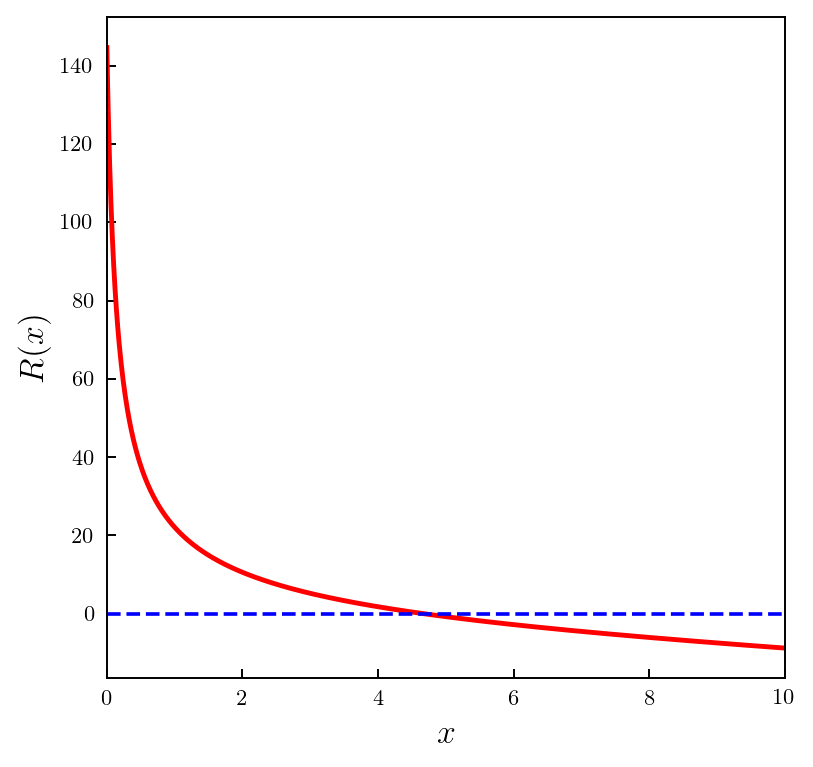

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline

x_vals = np.linspace(0.0,10.0,1000)
R_vals = R(x_vals)

plot_pretty()

fig = plt.figure(figsize = (5,5))

plt.plot(x_vals,R_vals, c='r', linewidth=2.0)
plt.plot(x_vals,np.zeros(1000), c='b', ls='--')

plt.xlim(0.0,10.0)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$R(x)$", fontsize=14)



plt.show()

From the above we see that the root is somewhere between 4 and 6. We'll search for the root in this interval.

In [38]:
root_riemann = hybrid_root_find(R, 4.0, 6.0, 1e-15)

print('Root of the "Riemann" function x=: %.18f'%root_riemann)


iteration no:1
iteration no:2
iteration no:3
iteration no:4
iteration no:5
iteration no:6
iteration no:7
iteration no:8
iteration no:9
iteration no:10
iteration no:11
iteration no:12
iteration no:13
iteration no:14
iteration no:15
iteration no:16
iteration no:17
Root of the "Riemann" function x=: 4.662935668398556111
